In [1]:
#Import our Dependencies
import os
import csv
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pull our DataFrame
df = pd.read_csv("../Resources/clean_data.csv")  
df.head()

,Unnamed: 0,Title,Director,Movie Length (s),Genre,Headlining Actor,Gross,Keywords,Language,Country,Rating,Budget,Release Year,IMDB Score,Director Facebook Likes,Headlining Actor Facebook Likes,Movie Facebook Likes,Cast Facebook Likes
0,0,Avatar,James Cameron,178.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,760505847.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,7.9,0.0,1000.0,33000,4834
1,1,Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,Action|Adventure|Fantasy,Johnny Depp,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000.0,2007.0,7.1,563.0,40000.0,0,48350
2,2,Spectre,Sam Mendes,148.0,Action|Adventure|Thriller,Christoph Waltz,200074175.0,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000.0,2015.0,6.8,0.0,11000.0,85000,11700
3,3,The Dark Knight Rises,Christopher Nolan,164.0,Action|Thriller,Tom Hardy,448130642.0,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000.0,2012.0,8.5,22000.0,27000.0,164000,106759
4,5,John Carter,Andrew Stanton,132.0,Action|Adventure|Sci-Fi,Daryl Sabara,73058679.0,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,263700000.0,2012.0,6.6,475.0,640.0,24000,1873


In [3]:
#split up the genres that were linked with the "|"
df['Genre'] = df['Genre'].str.split('|')
df = df.explode('Genre')
df.head()

,Unnamed: 0,Title,Director,Movie Length (s),Genre,Headlining Actor,Gross,Keywords,Language,Country,Rating,Budget,Release Year,IMDB Score,Director Facebook Likes,Headlining Actor Facebook Likes,Movie Facebook Likes,Cast Facebook Likes
0,0,Avatar,James Cameron,178.0,Action,CCH Pounder,760505847.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,7.9,0.0,1000.0,33000,4834
0,0,Avatar,James Cameron,178.0,Adventure,CCH Pounder,760505847.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,7.9,0.0,1000.0,33000,4834
0,0,Avatar,James Cameron,178.0,Fantasy,CCH Pounder,760505847.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,7.9,0.0,1000.0,33000,4834
0,0,Avatar,James Cameron,178.0,Sci-Fi,CCH Pounder,760505847.0,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000.0,2009.0,7.9,0.0,1000.0,33000,4834
1,1,Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,Action,Johnny Depp,309404152.0,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000.0,2007.0,7.1,563.0,40000.0,0,48350


In [4]:
#ignore irrelevant data maybe only genre and title and IMDB Score
genreDF = df[["Genre", "Title","IMDB Score"]]
genreDF.head()

,Genre,Title,IMDB Score
0,Action,Avatar,7.9
0,Adventure,Avatar,7.9
0,Fantasy,Avatar,7.9
0,Sci-Fi,Avatar,7.9
1,Action,Pirates of the Caribbean: At World's End,7.1


In [5]:
#Group by Genre
Genre_Grouped = genreDF.groupby('Genre')
Genre_Grouped.head()

,Genre,Title,IMDB Score
0,Action,Avatar,7.9
0,Adventure,Avatar,7.9
0,Fantasy,Avatar,7.9
0,Sci-Fi,Avatar,7.9
1,Action,Pirates of the Caribbean: At World's End,7.1
...,...,...,...
709,Documentary,This Is It,7.3
1663,Documentary,Winged Migration,8.0
1998,Documentary,Jackass 3D,7.1
2555,Documentary,Justin Bieber: Never Say Never,1.6


In [6]:
#Group by Score
IMDB_Grouped = genreDF.groupby('IMDB Score')
IMDB_Grouped.head()

,Genre,Title,IMDB Score
0,Action,Avatar,7.9
0,Adventure,Avatar,7.9
0,Fantasy,Avatar,7.9
0,Sci-Fi,Avatar,7.9
1,Action,Pirates of the Caribbean: At World's End,7.1
...,...,...,...
3072,Comedy,Chairman of the Board,2.3
3128,Comedy,Daddy Day Camp,2.9
3404,Comedy,Teen Wolf Too,3.2
3404,Fantasy,Teen Wolf Too,3.2


In [10]:
#How many movies in each Genre
Count = Genre_Grouped["Genre"].count()
Count

Genre
Action          962
Adventure       789
Animation       198
Biography       240
Comedy         1488
Crime           712
Documentary      52
Drama          1922
Family          447
Fantasy         512
Film-Noir         1
History         151
Horror          394
Music           158
Musical          98
Mystery         387
Romance         873
Sci-Fi          499
Sport           151
Thriller       1121
War             155
Western          59
Name: Genre, dtype: int64

In [13]:
#IMDB Score , Average rating per Genre
Genre_Average = Genre_Grouped.mean()
Genre_Average

,IMDB Score
Genre,
Action,6.290956
Adventure,6.452218
Animation,6.702525
Biography,7.152083
Comedy,6.184140
Crime,6.545225
Documentary,7.023077
Drama,6.782778
Family,6.211186


In [14]:
#How Many Movies share the same IMDB Score
Average = IMDB_Grouped["IMDB Score"].count()
Average

IMDB Score
1.6     2
1.9     4
2.0     2
2.1     8
2.2     3
       ..
8.8    15
8.9    10
9.0     6
9.2     2
9.3     2
Name: IMDB Score, Length: 74, dtype: int64

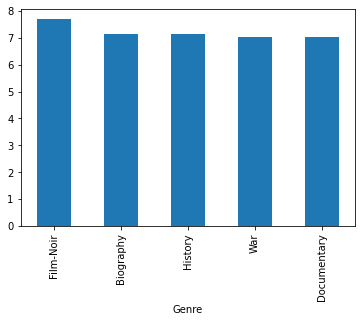

In [33]:
#Top 5 Genre catergories based on IMDB Score
topGdf = Genre_Average.sort_values("IMDB Score", ascending=False)
topGenre = topGdf["IMDB Score"].nlargest(5)
topGenre.plot.bar()

In [34]:
#top 5 Genres
topdf = Count.sort_values(ascending=False).nlargest(5)
topdf.head()

Genre
Drama       1922
Comedy      1488
Thriller    1121
Action       962
Romance      873
Name: Genre, dtype: int64

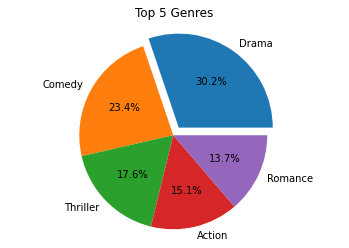

In [35]:
#Top 5 Genres in a pie chart
my_labels = 'Drama', 'Comedy', 'Thriller', 'Action', 'Romance'
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(topdf,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Top 5 Genres')
plt.axis('equal')
plt.show()

In [ ]:
#Top 5 Genres in a pie chart
my_labels = 'Drama', 'Comedy', 'Thriller', 'Action', 'Romance'
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(topdf,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Top 5 Genres')
plt.axis('equal')
plt.show()